In [ ]:
This is a simple implementation of a basic classifier for the Fashion-MNIST dataset

In [1]:
# Imports

import torch
import helper
from torch import nn, optim
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

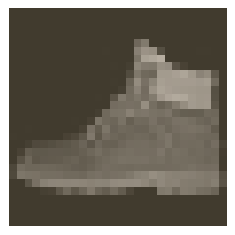

In [2]:
# Checking an image from the trainloader

image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [3]:
# Definition of the network architecture

model = nn.Sequential(nn.Linear(784,256),
                      nn.ReLU(),
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10))

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.02)

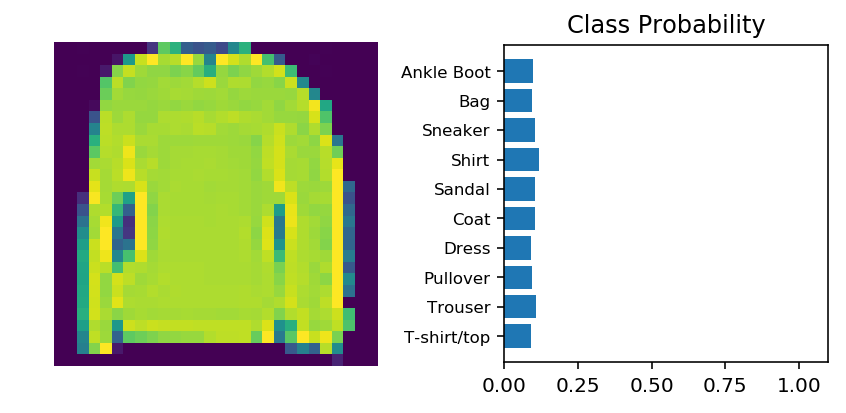

In [4]:
# Test the untrained network

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

images, labels = next(iter(trainloader))
img = images[0]

# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logits = model(img)
    sf = nn.Softmax(dim=1)
ps = sf(logits)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

In [5]:
# Train the network for 5 epochs

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images,labels in trainloader:
        images = images.view(images.shape[0],-1)
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else: #print(f"Training loss: {running_loss/len(trainloader)}")
        with torch.no_grad():
            for images,labels in testloader:
                images = images.view(images.shape[0],-1)
                logits = model(images)
                sf = nn.Softmax(dim=1)
                ps = sf(logits)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy = torch.mean(equals.type(torch.FloatTensor))
                print(f'Accuracy: {accuracy.item()*100}%')


Accuracy: 79.6875%
Accuracy: 76.5625%
Accuracy: 75.0%
Accuracy: 82.8125%
Accuracy: 73.4375%
Accuracy: 78.125%
Accuracy: 84.375%
Accuracy: 79.6875%
Accuracy: 76.5625%
Accuracy: 79.6875%
Accuracy: 71.875%
Accuracy: 84.375%
Accuracy: 76.5625%
Accuracy: 82.8125%
Accuracy: 65.625%
Accuracy: 73.4375%
Accuracy: 65.625%
Accuracy: 79.6875%
Accuracy: 73.4375%
Accuracy: 71.875%
Accuracy: 67.1875%
Accuracy: 76.5625%
Accuracy: 84.375%
Accuracy: 82.8125%
Accuracy: 78.125%
Accuracy: 79.6875%
Accuracy: 68.75%
Accuracy: 75.0%
Accuracy: 79.6875%
Accuracy: 75.0%
Accuracy: 79.6875%
Accuracy: 75.0%
Accuracy: 68.75%
Accuracy: 73.4375%
Accuracy: 79.6875%
Accuracy: 75.0%
Accuracy: 81.25%
Accuracy: 75.0%
Accuracy: 90.625%
Accuracy: 73.4375%
Accuracy: 70.3125%
Accuracy: 78.125%
Accuracy: 73.4375%
Accuracy: 81.25%
Accuracy: 79.6875%
Accuracy: 82.8125%
Accuracy: 78.125%
Accuracy: 75.0%
Accuracy: 68.75%
Accuracy: 73.4375%
Accuracy: 76.5625%
Accuracy: 76.5625%
Accuracy: 67.1875%
Accuracy: 75.0%
Accuracy: 79.6875%
A

Accuracy: 76.5625%
Accuracy: 87.5%
Accuracy: 85.9375%
Accuracy: 84.375%
Accuracy: 82.8125%
Accuracy: 93.75%
Accuracy: 89.0625%
Accuracy: 81.25%
Accuracy: 84.375%
Accuracy: 85.9375%
Accuracy: 70.3125%
Accuracy: 75.0%
Accuracy: 78.125%
Accuracy: 93.75%
Accuracy: 84.375%
Accuracy: 84.375%
Accuracy: 81.25%
Accuracy: 75.0%
Accuracy: 76.5625%
Accuracy: 89.0625%
Accuracy: 92.1875%
Accuracy: 81.25%
Accuracy: 84.375%
Accuracy: 87.5%
Accuracy: 89.0625%
Accuracy: 84.375%
Accuracy: 81.25%
Accuracy: 90.625%
Accuracy: 84.375%
Accuracy: 79.6875%
Accuracy: 82.8125%
Accuracy: 82.8125%
Accuracy: 84.375%
Accuracy: 82.8125%
Accuracy: 82.8125%
Accuracy: 82.8125%
Accuracy: 84.375%
Accuracy: 85.9375%
Accuracy: 87.5%
Accuracy: 85.9375%
Accuracy: 84.375%
Accuracy: 84.375%
Accuracy: 89.0625%
Accuracy: 82.8125%
Accuracy: 84.375%
Accuracy: 85.9375%
Accuracy: 82.8125%
Accuracy: 73.4375%
Accuracy: 78.125%
Accuracy: 82.8125%
Accuracy: 90.625%
Accuracy: 81.25%
Accuracy: 76.5625%
Accuracy: 92.1875%
Accuracy: 78.125%
A

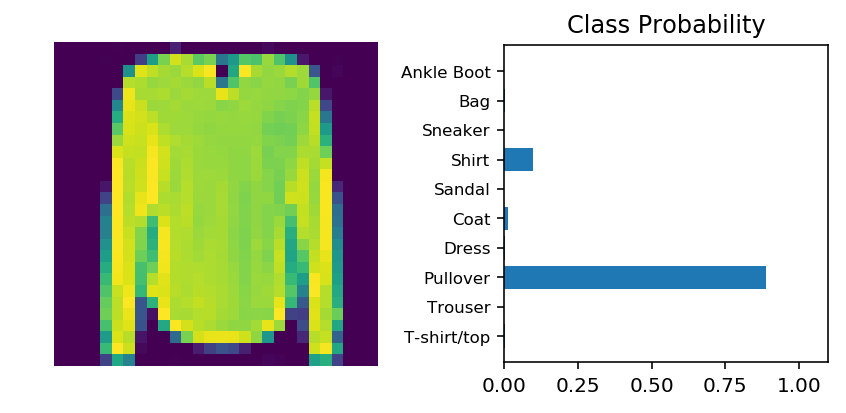

In [6]:
# Test the trained network

images, labels = next(iter(trainloader))
img = images[0]

# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logits = model(img)
    sf = nn.Softmax(dim=1)
ps = sf(logits)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')